<div style="solid #2196F3; padding:10px; border-radius:10px;">
  <h1 style="color:#2196F3; text-align:center;">Fashion MNIST Clothes Dataset Overview</h1>
  <p>
    Fashion MNIST is a modern replacement for the classic MNIST dataset, which is often called the "Hello, World" of computer vision.
    While MNIST contains images of handwritten digits (0-9), Fashion MNIST contains <strong>grayscale images of clothing items</strong> in the same 28x28 format.
  </p>
  <p>
    This dataset is slightly more challenging than MNIST, making it a good starting point to <strong>test and debug machine learning algorithms</strong>.
    It is relatively small but effective for verifying that a model works as expected.
  </p>
  <p>
    The dataset contains <strong>60,000 training images</strong> and <strong>10,000 test images</strong> for evaluating model performance.
    It can be easily accessed and loaded directly from <strong>TensorFlow</strong>.
  </p>
</div>


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [15]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

<h4>Let's explore the format of the dataset before training the model. The following shows there are <strong>60,000 images</strong> in the training set, with each image represented as <strong>28 x 28 pixels</strong>:</h4>

In [5]:
train_images.shape

(60000, 28, 28)

##### Likewise, there are 60,000 labels in the training set:



In [6]:
len(train_labels)

60000

##### Each label is an integer between 0 and 9:



In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

##### And the test set contains 10,000 images labels:



In [9]:
len(test_labels)

10000

# Preprocess the data


<h4> The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:</h4>

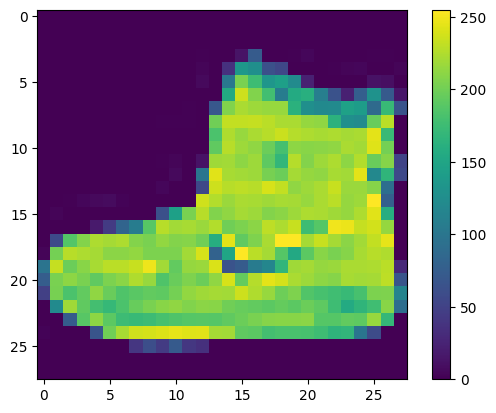

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h3>Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:</h3>

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<h3>To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.</h3>

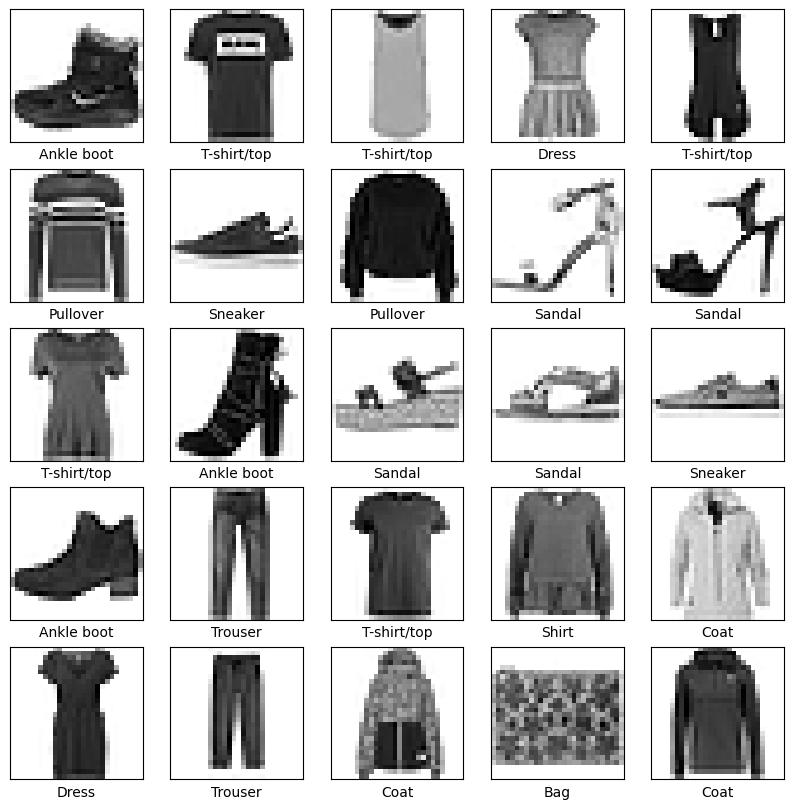

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

### Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers,compile the model then feed the model

<h4 style="line-height: 1.8;color:gray">The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as <b>tf.keras.layers.Dense</b>, have parameters that are learned during training.</h4>

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])
#Compile the model :
model.compile(optimizer='adam' ,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy']
             )
#Train the model :
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 3.2586 - accuracy: 0.7124
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6710 - accuracy: 0.7741
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5803 - accuracy: 0.8010
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5323 - accuracy: 0.8156
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5018 - accuracy: 0.8268
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8328
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.8371
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4741 - accuracy: 0.8405
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4730 - accuracy: 0.8384
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.456

<h4 style="line-height: 1.8;color:gray">As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about <b>0.84 (or 84%)</b> on the training data.</h4>

# Evaluate accuracy

In [21]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5531 - accuracy: 0.8108 - 739ms/epoch - 2ms/step

Test accuracy: 0.8108000159263611


<h4 style="line-height: 1.8;color:gray">It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.</h4>

# Make predictions

<h4 style="line-height: 1.8>With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.</h4>

<h4 style="line-height: 1.8;">With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.</h4>

In [23]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 937us/step


In [25]:
predictions[0]

array([5.5695824e-18, 1.7942727e-17, 0.0000000e+00, 7.1355834e-22,
       0.0000000e+00, 8.8194925e-03, 1.3777576e-27, 9.2894837e-02,
       5.7248289e-18, 8.9828563e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

<p>With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.</p>

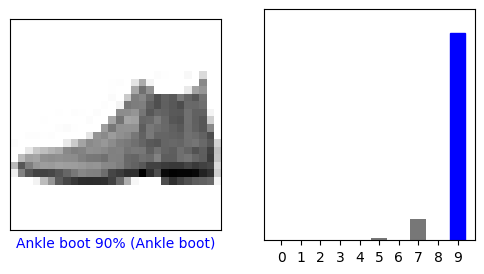

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

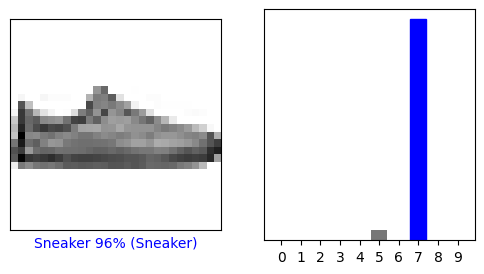

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

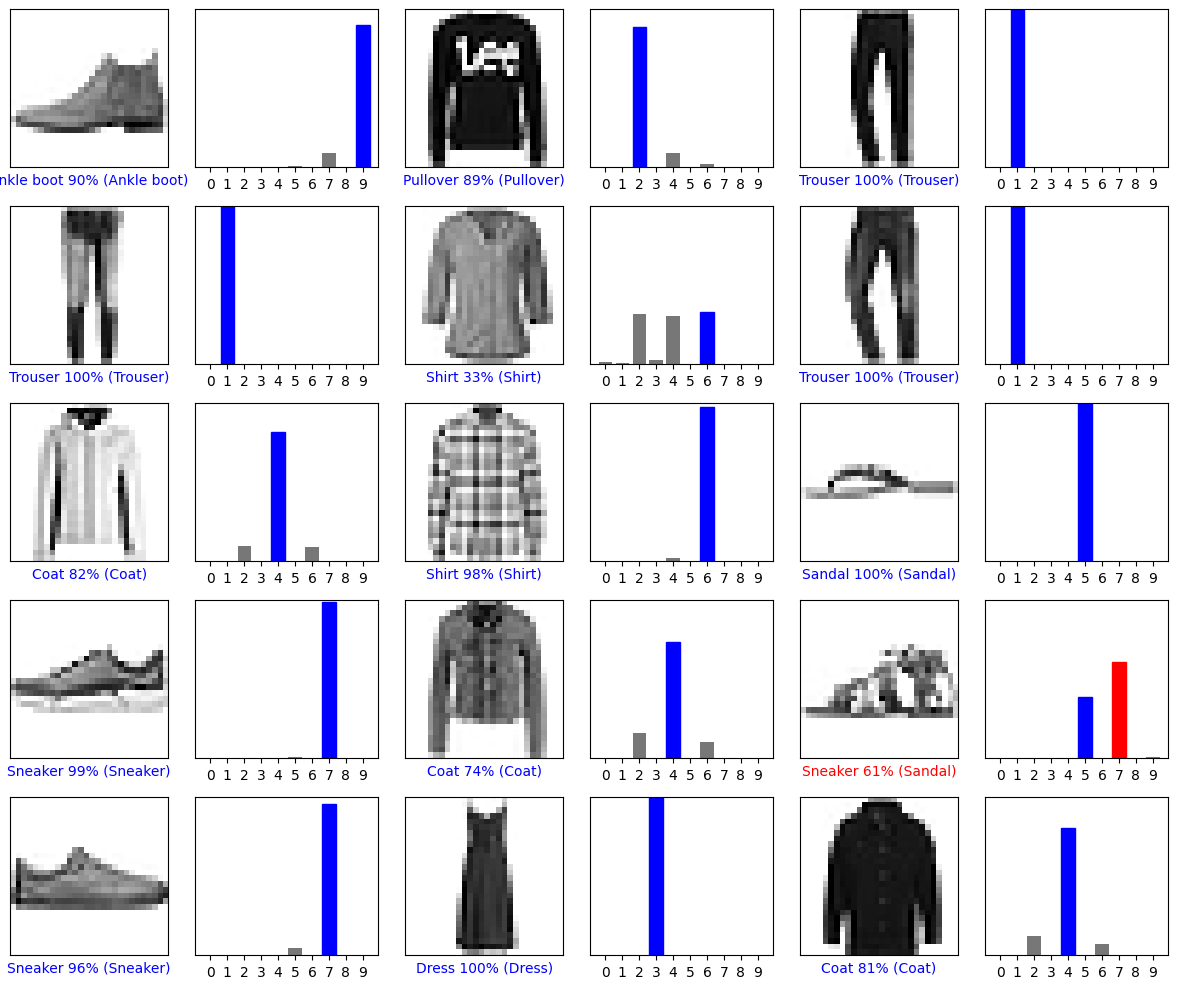

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Optional work

<h4 style="line-height: 1.8">Now we will change number of hidden layers and compare metrics ,also we we will compare the time to training the model on GPU vs CPU</h4>

In [53]:
def get_model(hidden_layers=1):
    layers = []
    # Your code goes here-----------START
    # Create Flatten input layers
    input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
    layers.append(input_layer)
    # Create hidden layers that are equal to hidden_layers argument in this function
    for i in range(hidden_layers):
        layers.append(tf.keras.layers.Dense(500, activation='relu'))
    # Create output 
    output_layer = tf.keras.layers.Dense(10,activation='sigmoid')
    layers.append(output_layer)
    # Your code goes here-----------END
    model = tf.keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                  metrics=['accuracy'])
    
    return model

In [40]:
model1 = get_model(1)
model1.fit(train_images,train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4466 - accuracy: 0.6767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7448 - accuracy: 0.7211
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6616 - accuracy: 0.7464
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6325 - accuracy: 0.7576
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6190 - accuracy: 0.7631


In [43]:
probability_model1 = tf.keras.Sequential([model1,tf.keras.layers.Softmax()])
predictions = probability_model1.predict(test_images)
predictions[2]

313/313 [==============================] - 0s 959us/step


array([3.3165968e-05, 9.9996340e-01, 5.9824040e-10, 8.4702395e-10,
       1.6591983e-14, 0.0000000e+00, 3.7926043e-12, 0.0000000e+00,
       3.5147752e-06, 0.0000000e+00], dtype=float32)

In [44]:
np.argmax(predictions[2])

1

In [45]:
test_labels[2]

1

In [46]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##### 5 Epochs performance comparison for 5 hidden layer

In [54]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code goes here
    model1 = get_model(5)
    model1.fit(train_images,train_labels, epochs=5)

Epoch 1/5


C:\Users\foura\anaconda3\envs\tensorflow-gpu310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 14s 7ms/step - loss: 0.9052 - accuracy: 0.7962
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4534 - accuracy: 0.8396
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4160 - accuracy: 0.8542
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3950 - accuracy: 0.8608
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3814 - accuracy: 0.8674
1min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [55]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model1 = get_model(5)
    model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8925 - accuracy: 0.7949
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4525 - accuracy: 0.8406
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8522
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3940 - accuracy: 0.8613
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8683
24.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


##### 5 Epocs performance comparison with 1 hidden layers

In [56]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model1 = get_model(1)
    model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5059 - accuracy: 0.7549
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5734 - accuracy: 0.8022
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5111 - accuracy: 0.8230
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4934 - accuracy: 0.8302
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4776 - accuracy: 0.8382
27.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [57]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model1 = get_model(1)
    model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7797 - accuracy: 0.7527
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5442 - accuracy: 0.8111
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8293
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4935 - accuracy: 0.8359
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.8399
18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Final Performance Results

| Epochs | CPU Time | GPU Time |
|:------:|:--------:|:--------:|
| 1      | 27.2 sec | 9.83 sec |
| 5      | 36.4 sec | 12.7 sec |